In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/PhD/Linear regression/concatenated_data.csv')
df

,word,speaker,emotion,time,position,target sentence,speaker gender,length,surprisal GPT,surprisal BERT,log probability
0,imamo,1,0,0.6,b,25,f,5.0,19.857792,3.380102,-6.051349
1,još,1,0,0.1,m,25,f,3.0,31.651057,0.000163,-7.325636
2,četiri,1,0,0.2,e,25,f,6.0,50.446848,0.000199,-8.268886
3,minuta,1,0,0.8,e,25,f,6.0,22.568617,0.000554,-9.569658
4,vremena do,1,0,0.3,e,25,f,9.0,32.872915,0.000472,-13.097782
...,...,...,...,...,...,...,...,...,...,...,...
75781,dugo,1052,4,1.1,b,40,m,4.0,19.776289,2.703350,-9.523365
75782,vremena,1052,4,0.6,m,40,m,7.0,40.858231,0.000097,-7.027754
75783,nismo,1052,4,0.3,e,40,m,5.0,22.771593,0.067076,-3.028636
75784,ovde,1052,4,0.5,e,40,m,4.0,18.642887,0.592845,-9.364560


In [3]:
# Display basic information about the DataFrame
print(df.info())

# Display basic statistics about the numeric columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75786 entries, 0 to 75785
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   word             75786 non-null  object 
 1   speaker          75786 non-null  int64  
 2   emotion          75786 non-null  int64  
 3   time             75786 non-null  float64
 4   position         75786 non-null  object 
 5   target sentence  75786 non-null  int64  
 6   speaker gender   75786 non-null  object 
 7   length           75786 non-null  float64
 8   surprisal GPT    75786 non-null  float64
 9   surprisal BERT   75786 non-null  float64
 10  log probability  75786 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 6.4+ MB
None
            speaker       emotion         time  target sentence        length  \
count  75786.000000  75786.000000  75786.00000     75786.000000  75786.000000   
mean     895.901367      1.864922      0.38641        28.576901 

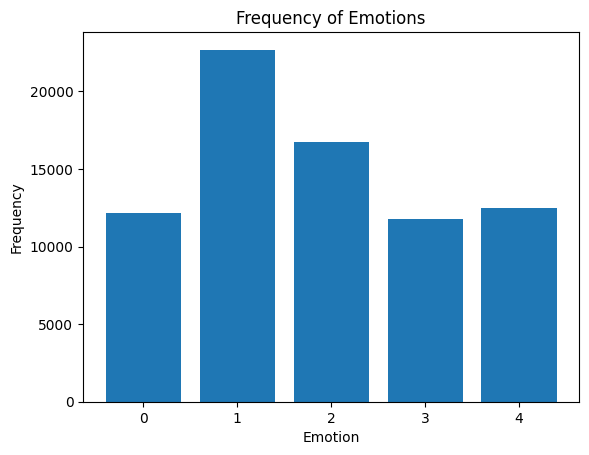

In [4]:
import matplotlib.pyplot as plt

# Count the frequency of values in the 'emotion' column
emotion_counts = df['emotion'].value_counts()

# Plot the histogram
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Frequency of Emotions')
plt.show()

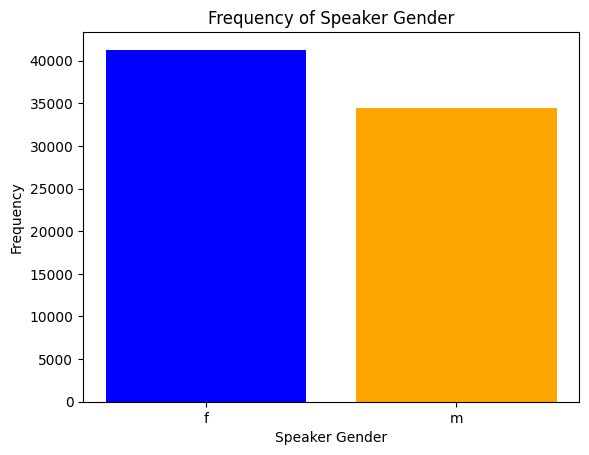

In [5]:
# Count the frequency of values in the 'speaker gender' column
gender_counts = df['speaker gender'].value_counts()

# Plot the histogram
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'orange'])
plt.xlabel('Speaker Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Speaker Gender')
plt.show()

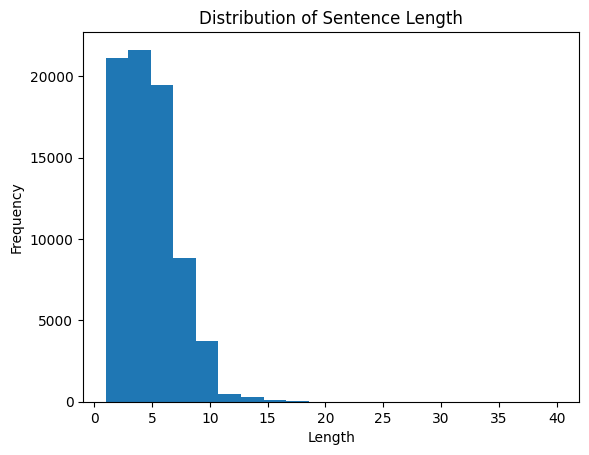

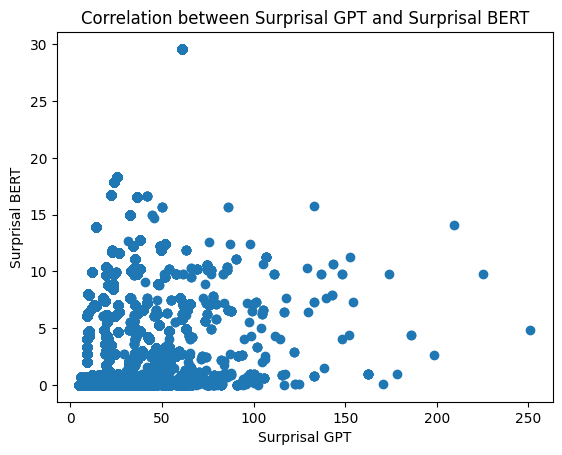

In [6]:
# Plot a histogram of the 'length' column
plt.hist(df['length'], bins=20)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Length')
plt.show()

# Create a scatter plot of 'surprisal GPT' vs 'surprisal BERT'
plt.scatter(df['surprisal GPT'], df['surprisal BERT'])
plt.xlabel('Surprisal GPT')
plt.ylabel('Surprisal BERT')
plt.title('Correlation between Surprisal GPT and Surprisal BERT')
plt.show()


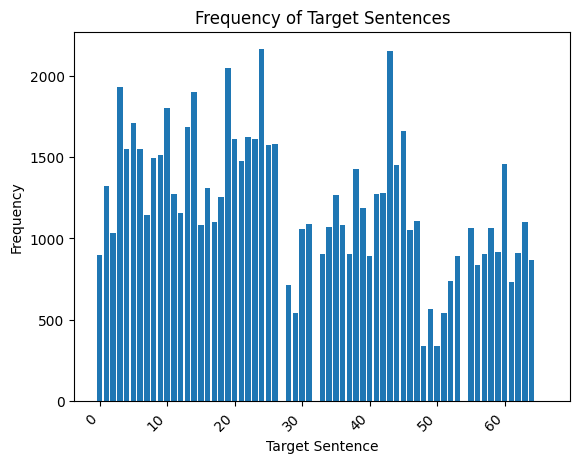

In [7]:
target_counts = df['target sentence'].value_counts()

# Plot the histogram
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target Sentence')
plt.ylabel('Frequency')
plt.title('Frequency of Target Sentences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

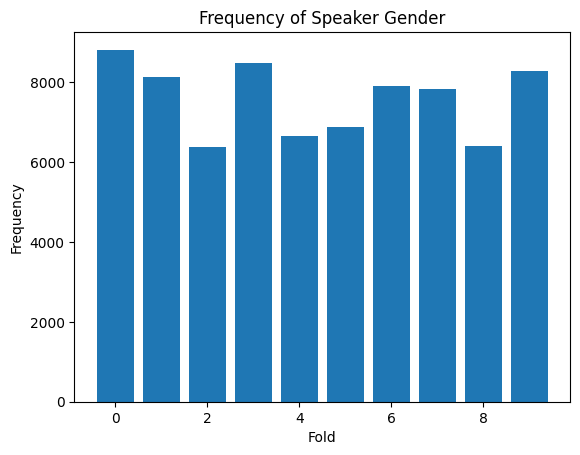

In [37]:
import random

k = 10 # number of folds

# Assuming df is your DataFrame
unique_target_sentences = df['target sentence'].unique()

# Shuffle the list randomly
random.shuffle(unique_target_sentences)

numbers = list(range(0, len(unique_target_sentences)))
folds = [i%k for i in numbers]

folds_df = pd.DataFrame({
    'target sentence': unique_target_sentences,
    'fold': folds
})


# Merge the two DataFrames on 'target sentence'
merged_df = pd.merge(df, folds_df, on='target sentence', how='left')

# Count the frequency of values in the 'speaker gender' column
fold_counts = merged_df['fold'].value_counts()

# Plot the histogram
plt.bar(fold_counts.index, fold_counts.values)
plt.xlabel('Fold')
plt.ylabel('Frequency')
plt.title('Frequency of Speaker Gender')
plt.show()

In [38]:
# Assuming merged_df is your DataFrame
output_path = '/content/drive/MyDrive/PhD/Linear regression/training_data.csv'

# Save the DataFrame to a CSV file
merged_df.to_csv(output_path, index=False)
